In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Since all the variables like : exports, health, imports are in percenatge and need to be calculated in there actual values
df['exports']= df['exports']*df['gdpp']/100
df['health']= df['health']*df['gdpp']/100
df['imports']= df['imports']*df['gdpp']/100

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
df.shape

(167, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
round(df.isnull().sum()/len(df)*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

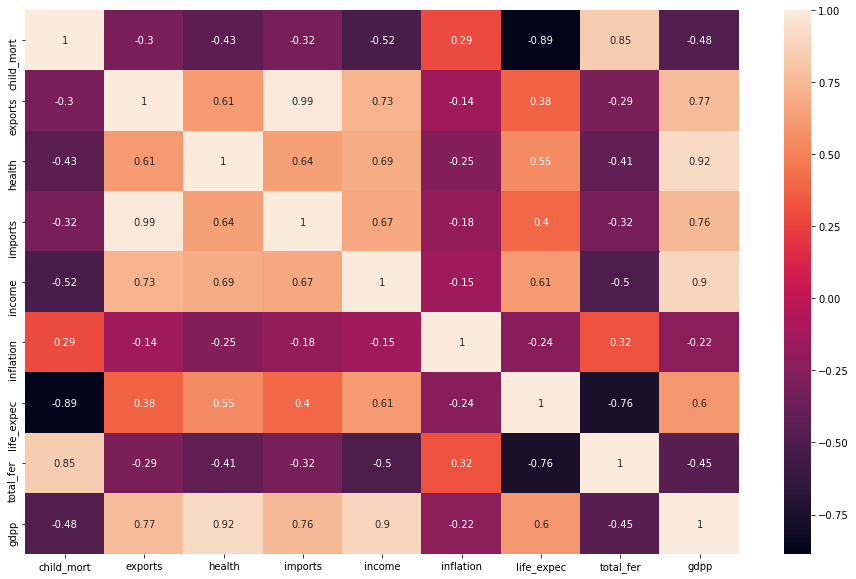

In [9]:
plt.figure(figsize= (16,10))
sns.heatmap(df.corr(), annot= True)

- A lot of highly correlated variables are there, hence use of PCA is justified

In [10]:
df_m = df.drop(['country'],axis =1)
df_m.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
# The variables are in different scales we need to perform the scaling 
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df_2 = Scaler.fit_transform(df_m)

In [12]:
df_2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [13]:
# Importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver= 'randomized', random_state= 42)

In [14]:
pca.fit(df_2)

PCA(random_state=42, svd_solver='randomized')

In [15]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

- Here we can see that 77% of the information is provided by 2 varibales

In [16]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

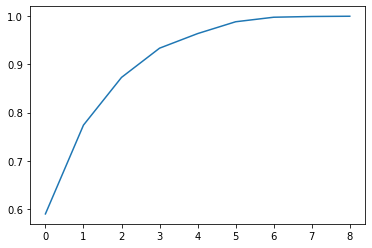

In [17]:
# making the scree plot 
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [28]:
pcFinal=PCA(n_components=3)
xnew=pcFinal.fit_transform(df_2).round(4)
dfnew=pd.DataFrame(xnew,columns=['PC1','PC2','PC3'])
dfnewH=dfnew.copy()
dfnew


,PC1,PC2,PC3
0,-2.6356,1.4723,-0.5495
1,-0.0242,-1.4299,-0.0141
2,-0.4596,-0.6755,0.9594
3,-2.7226,2.1723,0.6002
4,0.6486,-1.0234,-0.2574
...,...,...,...
162,-1.1752,-0.2757,-0.6671
163,-0.3142,-0.0163,3.6803
164,-0.5944,-1.0763,0.5289
165,-1.8024,0.5887,1.1809


In [29]:
# Lets check the Hopkins measure
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
# Here we check wether the PCA is good for clustering or not
hopkins(dfnew)

0.9421976268416437

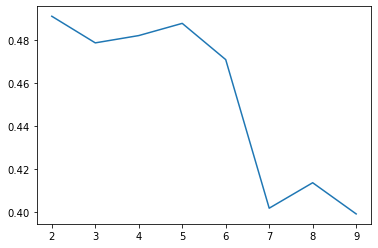

In [37]:
#Kmean clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Performing the silhoutte score for the Kmeans
sil = []
for k in range(2,10):
    kmeans = KMeans(n_clusters  = k,max_iter=50).fit(dfnew)
    sil.append([k,silhouette_score(dfnew, kmeans.labels_)])

plt.plot(pd.DataFrame(sil)[0],pd.DataFrame(sil)[1])

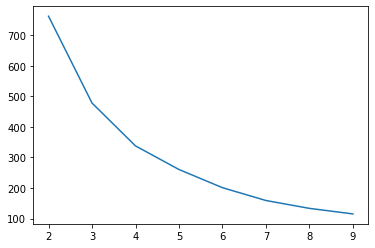

In [38]:
# Performing the elbow curve
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters= k).fit(dfnew)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

In [40]:
#As 3 is close to the local maxima at 4 for the silhouette_score plot adnd also shows deviation in elbow curve, taking n=3 for further clustering
model_kmean = KMeans(n_clusters =3, random_state = 50).fit(dfnew)
dfnew['country']=df['country']
dfnew.head()

,PC1,PC2,PC3,country
0,-2.6356,1.4723,-0.5495,Afghanistan
1,-0.0242,-1.4299,-0.0141,Albania
2,-0.4596,-0.6755,0.9594,Algeria
3,-2.7226,2.1723,0.6002,Angola
4,0.6486,-1.0234,-0.2574,Antigua and Barbuda


In [42]:
dat_km = pd.concat([dfnew.reset_index().drop('index',axis=1),pd.Series(model_kmean.labels_).reset_index().drop('index',axis=1)],axis=1)
dat_km.columns = ['PC1', 'PC2', 'PC3','country','KClusterID']
dat_km.head()

,PC1,PC2,PC3,country,KClusterID
0,-2.6356,1.4723,-0.5495,Afghanistan,2
1,-0.0242,-1.4299,-0.0141,Albania,0
2,-0.4596,-0.6755,0.9594,Algeria,0
3,-2.7226,2.1723,0.6002,Angola,2
4,0.6486,-1.0234,-0.2574,Antigua and Barbuda,0


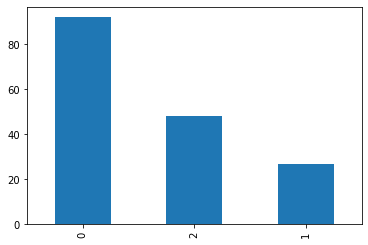

In [43]:
dat_km['KClusterID'].value_counts().plot(kind = 'bar')

In [45]:
#merging the original data
Final=pd.merge(df,dat_km[['country','KClusterID']], on='country')
Final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [46]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

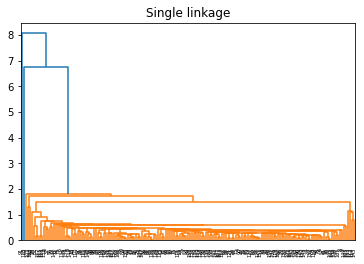

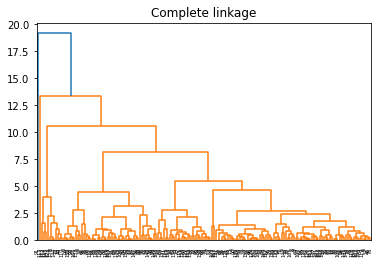

In [47]:
# Performing single  linkage
singlecluster = linkage(dfnewH, method = "single",metric = 'euclidean')
dendrogram(singlecluster)
plt.title('Single linkage')
plt.show()

# Performing complete linkage
completecluster = linkage(dfnewH, method = "complete",metric = 'euclidean')
dendrogram(completecluster)
plt.title('Complete linkage')
plt.show()

In [48]:
cluster_labels=cut_tree(completecluster,n_clusters=4).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [49]:
Final['HclusterID']=cluster_labels
Final.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KClusterID,HclusterID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,2,0
1,Albania,16.6,1145.200,267.8950,1987.740,9930,4.490,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.640,185.9820,1400.440,12900,16.100,76.5,2.89,4460,0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0,0
5,Argentina,14.5,1946.700,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0,0
6,Armenia,18.1,669.760,141.6800,1458.660,6700,7.770,73.3,1.69,3220,0,0
7,Australia,4.8,10276.200,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,1,0
8,Austria,4.3,24059.700,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,1,1
9,Azerbaijan,39.2,3171.120,343.3920,1208.880,16000,13.800,69.1,1.92,5840,0,0


In [50]:
print(Final['HclusterID'].value_counts())
print(Final['KClusterID'].value_counts())

0    154
1     11
3      1
2      1
Name: HclusterID, dtype: int64
0    92
2    48
1    27
Name: KClusterID, dtype: int64


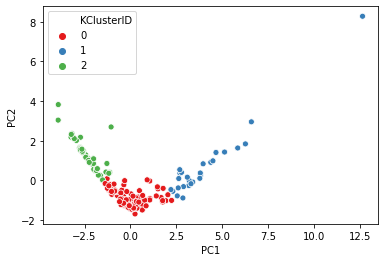

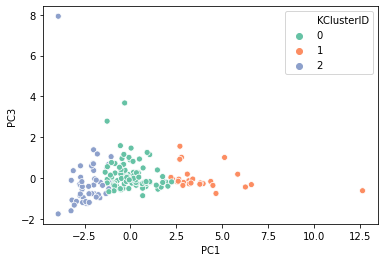

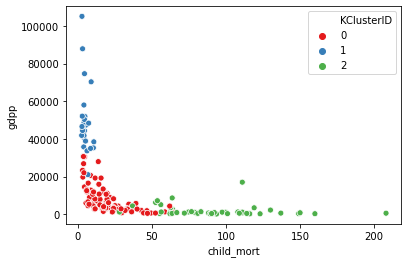

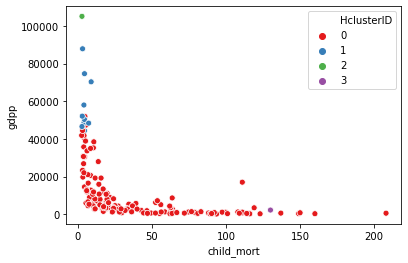

In [51]:
sns.scatterplot(x='PC1',y = 'PC2',hue= 'KClusterID',data = dat_km,palette = 'Set1')
plt.show()
sns.scatterplot(x='PC1',y = 'PC3',hue= 'KClusterID',data = dat_km,palette = 'Set2')
plt.show()


sns.scatterplot(x='child_mort',y='gdpp', hue= 'KClusterID',data = Final,palette = 'Set1')
plt.show()
sns.scatterplot(x='child_mort',y='gdpp', hue= 'HclusterID',data = Final,palette = 'Set1')

<Figure size 1440x864 with 0 Axes>

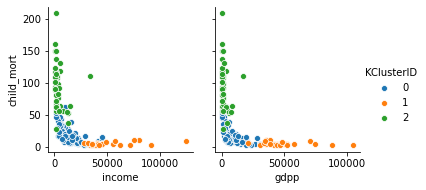

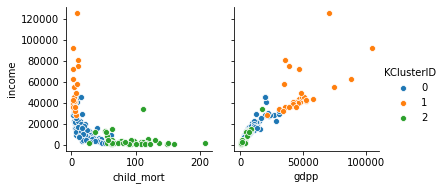

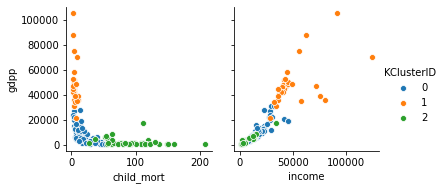

In [52]:
plt.figure(figsize=(20,12))
sns.pairplot(y_vars='child_mort',x_vars=['income', 'gdpp'],hue='KClusterID',data = Final)
sns.pairplot(y_vars='income',x_vars=['child_mort', 'gdpp'],hue='KClusterID',data = Final)
sns.pairplot(y_vars='gdpp',x_vars=['child_mort', 'income'],hue='KClusterID',data = Final)

In [53]:
#Data summary of Kcluster Ids
print("KClusterID = 0 \n",Final[Final['KClusterID']==0].describe())
print("KClusterID = 1 \n",Final[Final['KClusterID']==1].describe())
print("KClusterID = 2 \n",Final[Final['KClusterID']==2].describe())

KClusterID = 0 
        child_mort       exports       health       imports        income  \
count   92.000000     92.000000    92.000000     92.000000     92.000000   
mean    20.177174   3650.066288   573.165330   3759.545881  14169.456522   
std     14.095983   3758.035772   623.537749   3463.217447   9474.287745   
min      3.200000      1.076920    19.463600      0.651092   1990.000000   
25%     10.275000   1003.987500   179.336250   1375.405000   7150.000000   
50%     17.150000   1876.810000   366.440000   2370.465000  11300.000000   
75%     26.200000   5184.400000   740.455000   5183.775000  19175.000000   
max     64.400000  15046.200000  2928.780000  14718.600000  45400.000000   

       inflation  life_expec  total_fer          gdpp  KClusterID  HclusterID  
count  92.000000   92.000000  92.000000     92.000000        92.0        92.0  
mean    6.995435   73.552174   2.225652   8226.869565         0.0         0.0  
std     7.768033    4.097908   0.679580   7140.250011     

In [54]:
#list of countries by cluster
print("KClusterID = 0 \n",Final[Final['KClusterID']==0]['country'])
print("KClusterID = 1 \n",Final[Final['KClusterID']==1]['country'])
print("KClusterID = 2 \n",Final[Final['KClusterID']==2]['country'])

KClusterID = 0 
 1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 92, dtype: object
KClusterID = 1 
 7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
144         

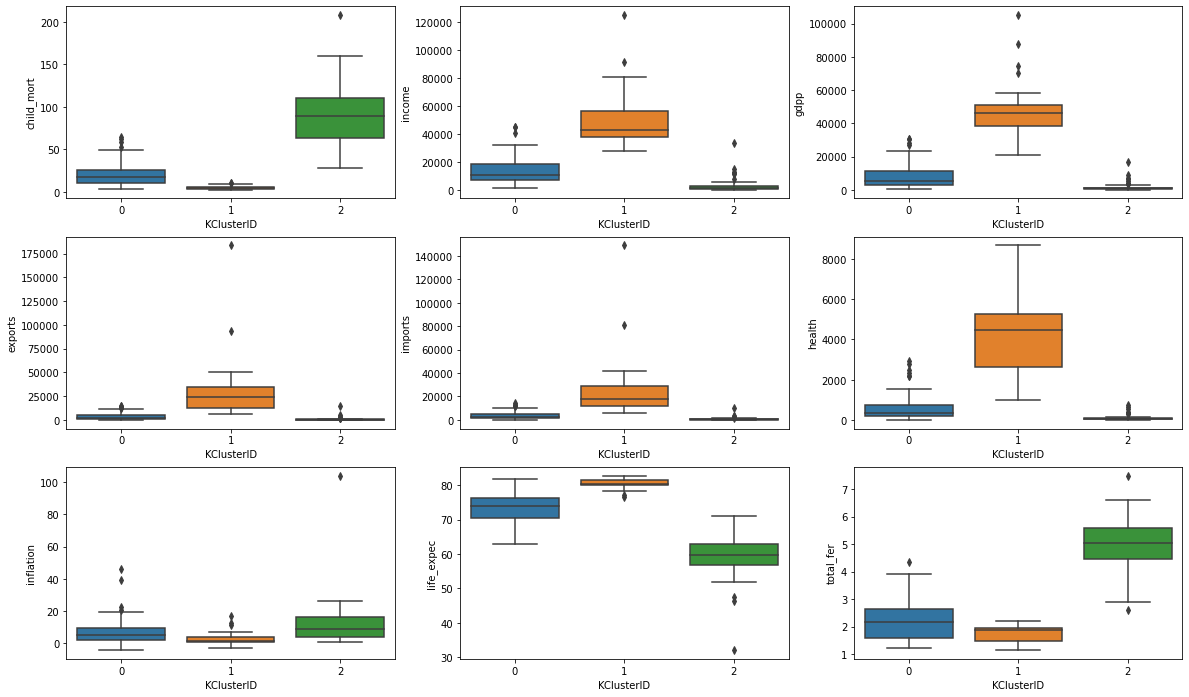

In [55]:
plt.figure(figsize=(20,12))
var = ['child_mort', 'income', 'gdpp','exports','imports','health','inflation','life_expec','total_fer']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'KClusterID',y= i[1], data = Final)

In [56]:
clusterO=Final[Final['KClusterID']==0]
print(clusterO[['country','child_mort','gdpp','income']].sort_values(by=['child_mort','gdpp','income'],ascending=False))


            country  child_mort   gdpp  income
107         Myanmar        64.4    988    3720
154    Turkmenistan        62.0   4440    9940
69            India        58.8   1350    4410
146      Tajikistan        52.4    738    2110
12       Bangladesh        49.4    758    2440
..              ...         ...    ...     ...
60           Greece         3.9  26900   28700
122        Portugal         3.9  22500   27200
139           Spain         3.8  30700   32500
43   Czech Republic         3.4  19800   28300
135        Slovenia         3.2  23400   28700

[92 rows x 4 columns]


In [58]:
clusterI=Final[Final['KClusterID']==1]
print(clusterI[['country','child_mort','gdpp','income']].sort_values(by=['child_mort','gdpp','income'],ascending=False))

                  country  child_mort    gdpp  income
82                 Kuwait        10.8   38500   75200
23                 Brunei        10.5   35300   80600
123                 Qatar         9.0   70300  125000
157  United Arab Emirates         8.6   35000   57600
159         United States         7.3   48400   49400
98                  Malta         6.8   21100   28300
111           New Zealand         6.2   33700   32300
29                 Canada         5.6   47400   40700
158        United Kingdom         5.2   38900   36200
7               Australia         4.8   51900   41400
145           Switzerland         4.5   74600   55500
110           Netherlands         4.5   50300   45500
15                Belgium         4.5   44400   41100
8                 Austria         4.3   46900   43200
73                Ireland         4.2   48700   45700
58                Germany         4.2   41800   40400
54                 France         4.2   40600   36900
44                Denmark   

In [59]:
clusterII=Final[Final['KClusterID']==2]
print(clusterII[['country','child_mort','gdpp','income']].sort_values(by=['child_mort','gdpp','income'],ascending=False))

                      country  child_mort   gdpp  income
66                      Haiti       208.0    662    1500
132              Sierra Leone       160.0    399    1220
32                       Chad       150.0    897    1930
31   Central African Republic       149.0    446     888
97                       Mali       137.0    708    1870
113                   Nigeria       130.0   2330    5150
112                     Niger       123.0    348     814
3                      Angola       119.0   3530    5900
25               Burkina Faso       116.0    575    1430
37           Congo, Dem. Rep.       116.0    334     609
64              Guinea-Bissau       114.0    547    1390
49          Equatorial Guinea       111.0  17100   33700
40              Cote d'Ivoire       111.0   1220    2690
17                      Benin       111.0    758    1820
63                     Guinea       109.0    648    1190
28                   Cameroon       108.0   1310    2660
106                Mozambique  